# Haberman Dataset

Objective : Classify whether a patient will live 5 years or more after receiving the treatment or not

Data Set Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) -- 1 = the patient survived 5 years or longer -- 2 = the patient died within 5 year

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#Suppress the warnings encountered
warnings.filterwarnings('ignore')

In [36]:
hb_data = pd.read_csv('./haberman.csv', 
        names=['Age', 'Year_of_surgery', 'No_of_axil_nodes', 'Surv_status'])

In [37]:
# Number of data points and features in the dataset
# 306 data points are present and 4 features are present in the dataset.

print(hb_data.shape)

(306, 4)


In [6]:
# Column names in the dataset. These will be the same as we
# assigned above while loading the dataset.

print(hb_data.columns)

Index(['Age', 'Year_of_surgery', 'No_of_axil_nodes', 'Surv_status'], dtype='object')


In [7]:
#Number of classes present
#Number of data points for each class

hb_data['Surv_status'].value_counts()

# 2 classes are present and the number of data points belonging to class Surv_status=1 are
# almost 3 times the number of data points belonging to class Surv_status=2.
# Hence dataset is not balanced as such.
# Class Surv_status = 1 -> 225 data points
# Class Surv_status = 2 -> 81 data points

1    225
2     81
Name: Surv_status, dtype: int64

In [8]:
hb_data.describe()

,Age,Year_of_surgery,No_of_axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [38]:
#Statistics on data with class label Survival status = 1 
# i.e. people who survived 5 years or more
data_status1 = hb_data.loc[hb_data['Surv_status'] == 1]
data_status1.describe()

,Age,Year_of_surgery,No_of_axil_nodes,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [39]:
#Statistics on data with class label Survival status = 1 
# i.e. people who survived less than 5 years
data_status2 = hb_data.loc[hb_data['Surv_status'] == 2]
data_status2.describe()

,Age,Year_of_surgery,No_of_axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


### OBSERVATIONS :

Age of the patients vary from 30 to 83 with a mean of 52.

Number of positive lymph nodes detected vary from 0 to 52 but mean is just 4. 

75 percent patients had less than 4 positive lymph nodes detected.

For people who didn't survive 5 years, positive lymph nodes are more uniformally 
distributed across percentiles compared to people who survived 5 years or more.

# 2-D Scatter plots

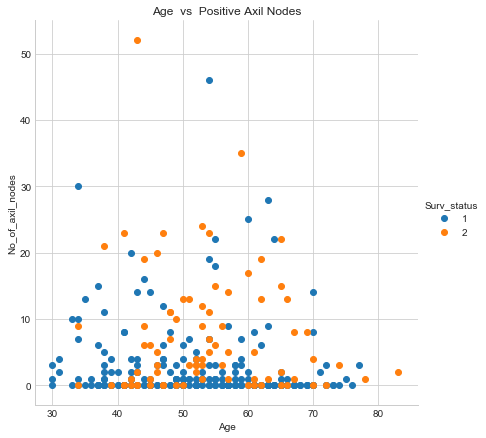

In [41]:
# 2-D Scatter plot with color-coding for each class
# Plotting (Age, axil_nodes_det), (Age, Op_Year), (Op_Year, axil_nodes_det)

sns.set_style('whitegrid')
sns.FacetGrid(data=hb_data, hue='Surv_status', size=6)\
.map(plt.scatter, 'Age', 'No_of_axil_nodes')\
.add_legend()
plt.title('Age  vs  Positive Axil Nodes')
plt.show()

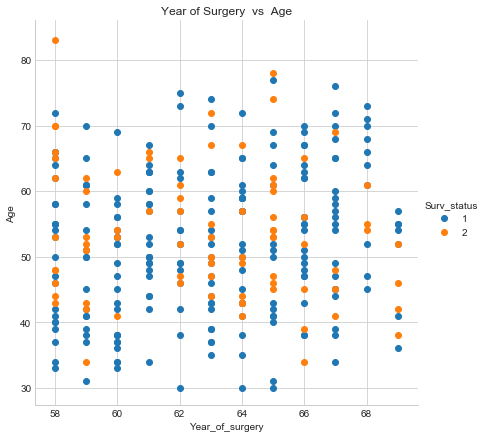

In [42]:
sns.FacetGrid(data=hb_data, hue='Surv_status', size=6)\
.map(plt.scatter, 'Year_of_surgery', 'Age')\
.add_legend()
plt.title('Year of Surgery  vs  Age')
plt.show()

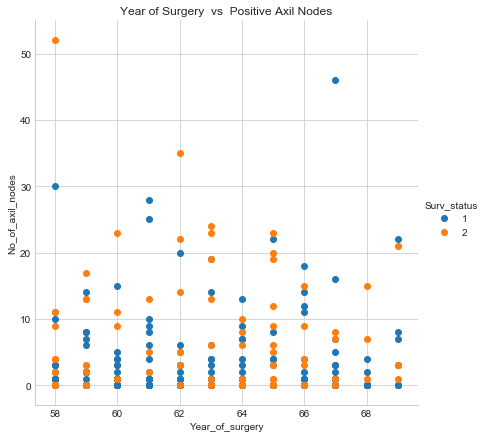

In [43]:
sns.FacetGrid(data=hb_data, hue='Surv_status', size=6)\
.map(plt.scatter, 'Year_of_surgery', 'No_of_axil_nodes')\
.add_legend()
plt.title('Year of Surgery  vs  Positive Axil Nodes')
plt.show()

### OBSERVATIONS :

There is no clear separation boundary between the class labels i.e. Survival status 1 and Survival status 2

Not able to infer much from the 2-D scatter plots regarding which features can be more helpul in classification

Data points seem to be better separated when Age is plotted against number of 
positive auxillary nodes detected
or when Year of surgery is plotted against number of positive auxillary nodes detected


# Pair Plots

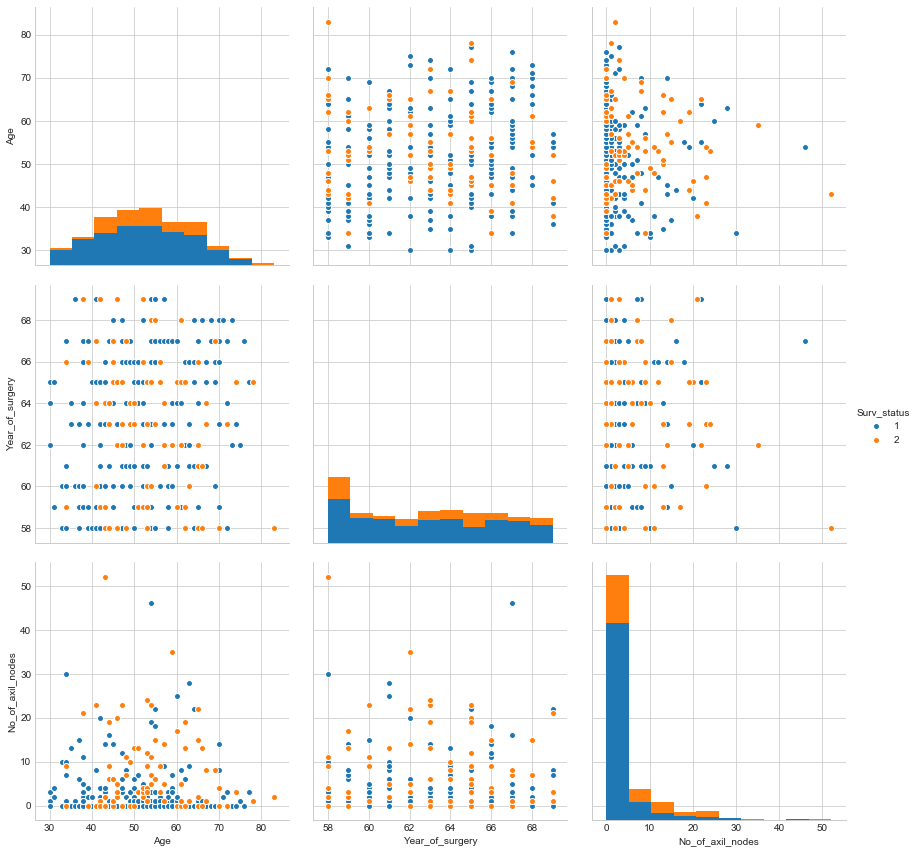

In [44]:
sns.pairplot(hb_data, hue='Surv_status', 
             vars=['Age', 'Year_of_surgery', 'No_of_axil_nodes'], size=4)
plt.show()

### OBSERVATIONS:

No two features seems to be providing a clear picture on separating class labels.

There is a considerable overlap no matter which two features are plotted against each other.

No linearly seperable boundary for class labels based on the features present in the dataset.

# Distribution Plots

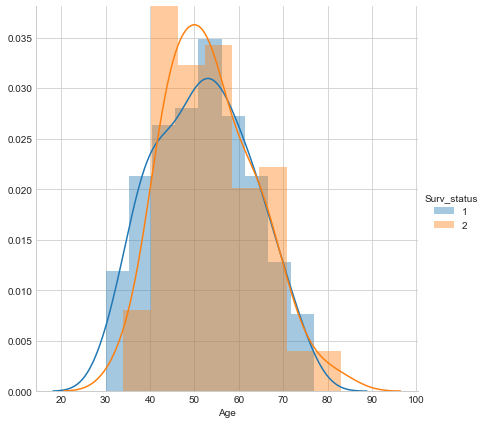

In [45]:
#Visualizing features in 1D using distribution plots

sns.FacetGrid(hb_data, hue='Surv_status', size=6).\
map(sns.distplot, 'Age')\
.add_legend()
plt.show()

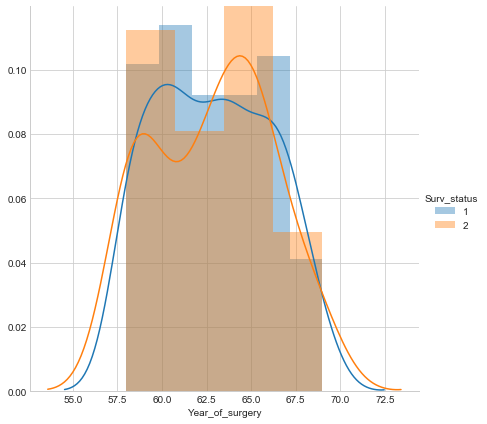

In [46]:
sns.FacetGrid(hb_data, hue='Surv_status', size=6)\
.map(sns.distplot, 'Year_of_surgery')\
.add_legend()
plt.show()

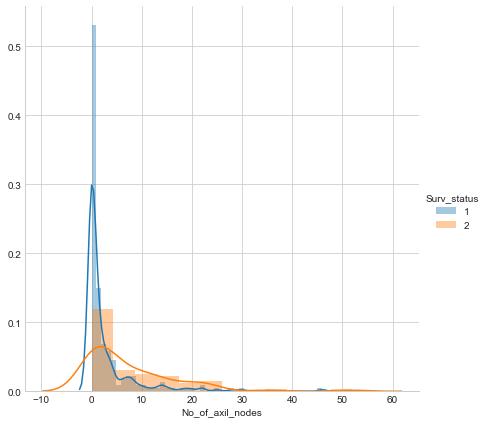

In [47]:
sns.FacetGrid(hb_data, hue='Surv_status', size=6)\
.map(sns.distplot, 'No_of_axil_nodes')\
.add_legend()
plt.show()

### OBSERVATIONS:

For each feature, distribution plot seems to be somewhat normally distributed for class labels.

But plot for positive lymph nodes has a long tail in case of people who didn't survive. 

Most of the positive lymph nodes for poeple who survived are concentrated between 0 - 4.

# Plotting PDF / CDF

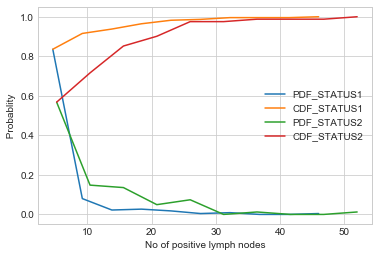

In [53]:
#PDF and CDF calculation for 'Axil nodes detected' 
#in people with Survival status 1
counts, bin_edges = np.histogram(data_status1["No_of_axil_nodes"], 
                                 bins=10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


#PDF and CDF calculation for 'Axil nodes detected' 
#in people with Survival status 2
counts, bin_edges = np.histogram(data_status2["No_of_axil_nodes"],
                                 bins=10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('No of positive lymph nodes')
plt.ylabel(' Probablity ')
plt.gca().legend(('PDF_STATUS1', 'CDF_STATUS1', 
                  'PDF_STATUS2', 'CDF_STATUS2'))
plt.show()


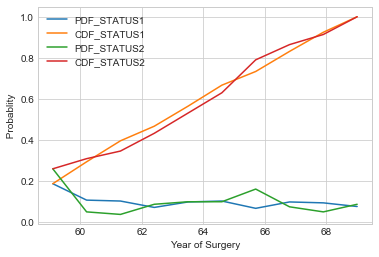

In [52]:
#PDF and CDF calculation for 'Year of surgery' in 
#people with Survival status 1
counts, bin_edges = np.histogram(data_status1["Year_of_surgery"], 
                                 bins=10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


#PDF and CDF calculation for 'Year of surgery' 
#in people with Survival status 2
counts, bin_edges = np.histogram(data_status2["Year_of_surgery"], 
                                 bins=10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('Year of Surgery')
plt.ylabel(' Probablity ')
plt.gca().legend(('PDF_STATUS1', 'CDF_STATUS1', 
                  'PDF_STATUS2', 'CDF_STATUS2'))
plt.show()

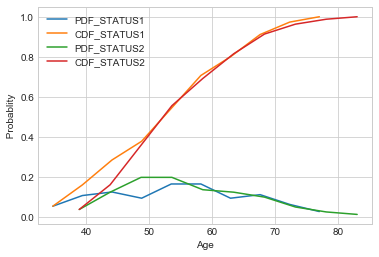

In [51]:
#PDF and CDF calculation for 'Age' in 
#people with Survival status 1
counts, bin_edges = np.histogram(data_status1["Age"], 
                                 bins=10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


#PDF and CDF calculation for 'Age' in 
#people with Survival status 2
counts, bin_edges = np.histogram(data_status2["Age"], 
                                 bins=10, density = True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('Age')
plt.ylabel(' Probablity ')
plt.gca().legend(('PDF_STATUS1', 'CDF_STATUS1', 
                  'PDF_STATUS2', 'CDF_STATUS2'))
plt.show()

### OBSERVATIONS:

More than 80% of the patients had 5 or less positive lymph nodes as CDF indicates for people who survived 5 years or more.

On the other hand less than 60% had 5 or less lymph nodes for people who didn't survive.


# Box Plots

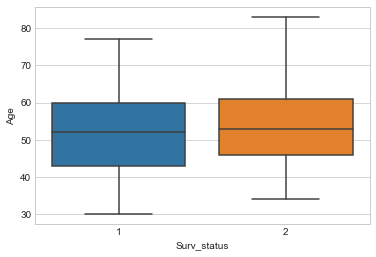

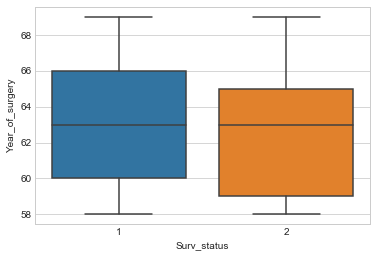

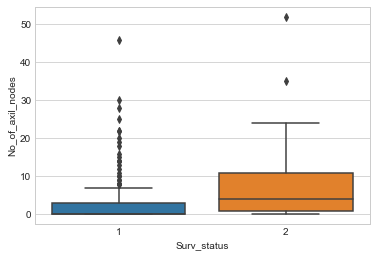

In [54]:
sns.boxplot(x='Surv_status', y='Age', data=hb_data)
plt.show()

sns.boxplot(x='Surv_status', y='Year_of_surgery', data=hb_data)
plt.show()

sns.boxplot(x='Surv_status', y='No_of_axil_nodes', data=hb_data)
plt.show()

### OBSERVATIONS:

People treated after 1966 had a slightly higher chance of survival and people treated before 1959 had a slightly lower chance of survival.






# CONCLUSION :

Auxillary lymph nodes seems to be a detemining factor in survival status.

Most of the people who survived have auxillary lymph nodes close to 0.

There are 117 people who had 0 auxillary lymph nodes detected and survived 5 years or more.